<a href="https://colab.research.google.com/github/ZehanQin/ECON5200-Applied-Data-Analytics-in-Econ/blob/main/Lab%204/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


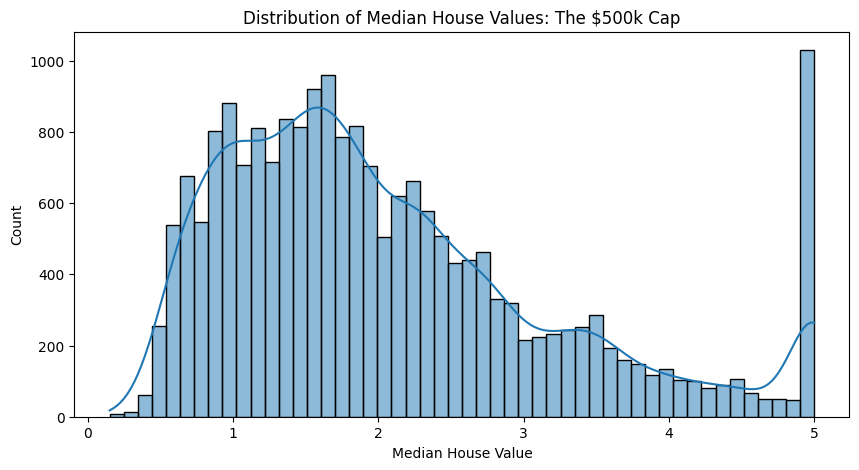

In [26]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

data= fetch_california_housing(as_frame=True)
df=data.frame

print(df['MedHouseVal'].describe())

plt.figure(figsize=(10,5))
sns.histplot(df['MedHouseVal'], bins=50, kde=True)
plt.title('Distribution of Median House Values: The $500k Cap')
plt.xlabel('Median House Value')
plt.show()

In [27]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [28]:
def flag_outliers_iqr(df, column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1

  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  return(df[column]<lower_bound) | (df[column]>upper_bound)

df['outlier_iqr']=flag_outliers_iqr(df, 'MedInc')

print(f"Manual Outliers Detected: {df['outlier_iqr'].sum()}")
print("These are primarily the 'Wealthy' districts.")


Manual Outliers Detected: 681
These are primarily the 'Wealthy' districts.


In [29]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,outlier_iqr
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,True
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,True
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,False
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,False
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,False
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,False
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,False
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,False
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,False


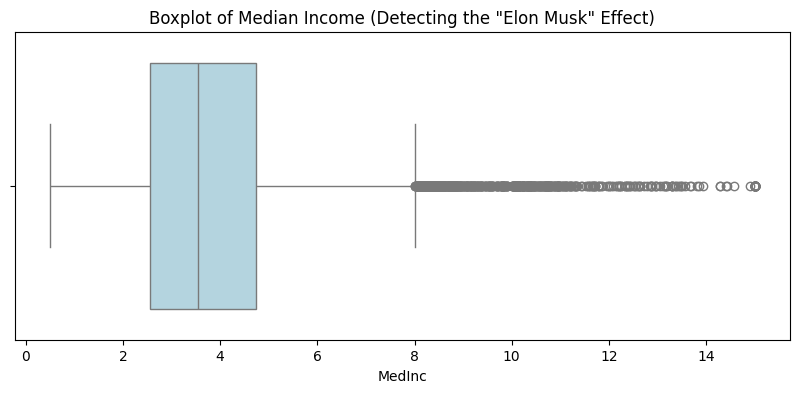

In [30]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['MedInc'], color='lightblue')
plt.title('Boxplot of Median Income (Detecting the "Elon Musk" Effect)')
plt.show()

In [31]:
iso_forest=IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
features=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population']
preds=iso_forest.fit_predict(df[features])
df['outlier_iso']=preds==-1
print(f"Algorithmic Outliers Detected:{df['outlier_iso'].sum()}")


Algorithmic Outliers Detected:1032


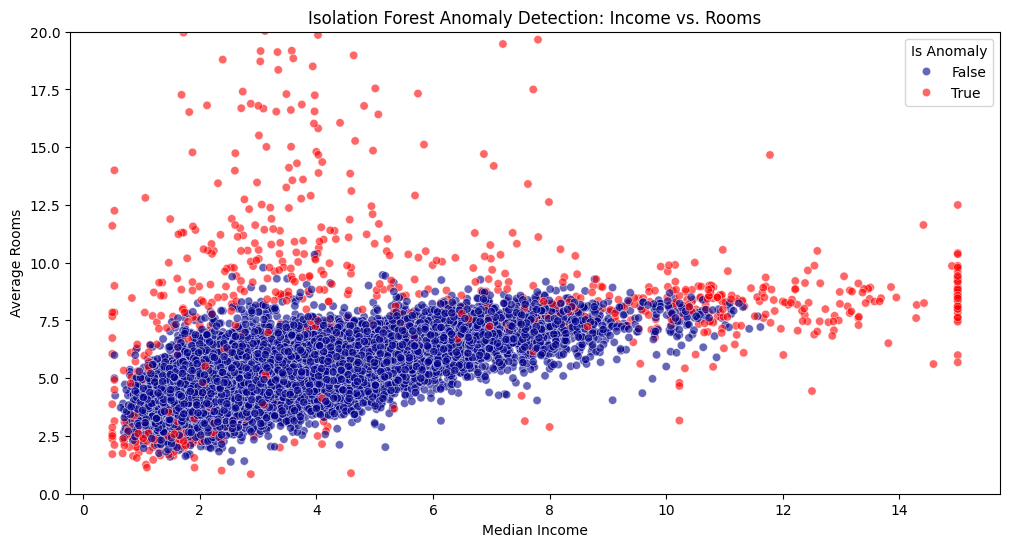

In [32]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='MedInc',
    y='AveRooms',
    hue='outlier_iso',
    palette={True:'red',False:'darkblue'},
    alpha=0.6
)

plt.title("Isolation Forest Anomaly Detection: Income vs. Rooms")
plt.xlabel("Median Income")
plt.ylabel('Average Rooms')
plt.ylim(0,20)
plt.legend(title='Is Anomaly')
plt.show()

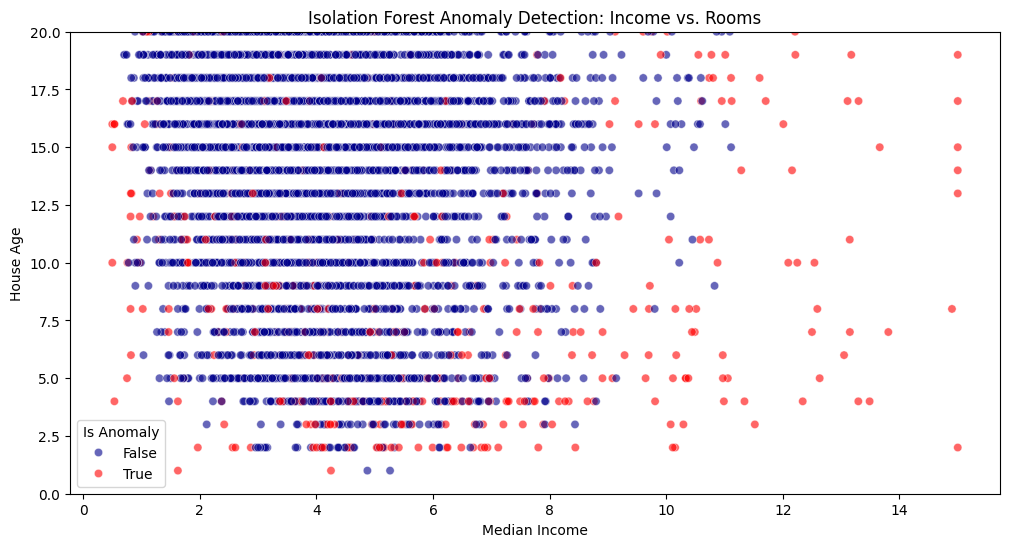

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='MedInc',
    y='HouseAge',
    hue='outlier_iso',
    palette={True:'red',False:'darkblue'},
    alpha=0.6
)

plt.title("Isolation Forest Anomaly Detection: Income vs. Rooms")
plt.xlabel("Median Income")
plt.ylabel('House Age')
plt.ylim(0,20)
plt.legend(title='Is Anomaly')
plt.show()

Phase 4 AI Response:

Normal points: 19608
Outlier points: 1032

📊 COMPARATIVE FORENSICS REPORT
                        Metric  Normal_MedInc  Outlier_MedInc  Normal_MedHouseVal  Outlier_MedHouseVal
                          Mean         3.7696          5.7908              2.0370               2.6682
                        Median         3.5156          4.2570              1.7890               2.0570
                       Std Dev         1.6406          4.1454              1.1141               1.6348
                           MAD         1.0316          2.4919              0.6740               1.1030
Inequality Wedge (Mean-Median)         0.2540          1.5338              0.2480               0.6112

🔍 INEQUALITY WEDGE ANALYSIS (Outliers)
  MedInc Wedge:      1.5338
  MedHouseVal Wedge: 0.6112

  → Positive wedge = right-skewed (high-end tail)
  → Larger wedge in outliers suggests extreme values pulling mean up


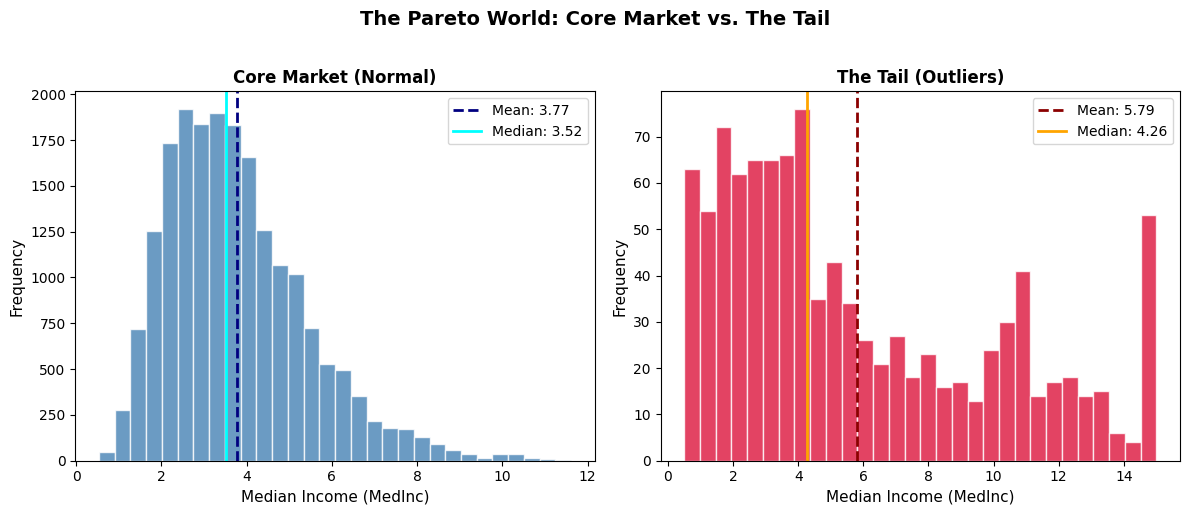

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Split data into normal and outlier groups
df_normal = df[df['outlier_iso'] == False].copy()
df_outlier = df[df['outlier_iso'] == True].copy()

print(f"Normal points: {len(df_normal)}")
print(f"Outlier points: {len(df_outlier)}")
print("=" * 60)

# 2. Calculate Mean and Median for both groups
def calc_stats(data, col):
    return {
        'Mean': data[col].mean(),
        'Median': data[col].median(),
        'Std': data[col].std(),
        'MAD': (data[col] - data[col].median()).abs().median()
    }

# Stats for Normal group
normal_income = calc_stats(df_normal, 'MedInc')
normal_value = calc_stats(df_normal, 'MedHouseVal')

# Stats for Outlier group
outlier_income = calc_stats(df_outlier, 'MedInc')
outlier_value = calc_stats(df_outlier, 'MedHouseVal')

# 3. Build summary table
summary = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std Dev', 'MAD', 'Inequality Wedge (Mean-Median)'],
    'Normal_MedInc': [
        normal_income['Mean'], normal_income['Median'],
        normal_income['Std'], normal_income['MAD'],
        normal_income['Mean'] - normal_income['Median']
    ],
    'Outlier_MedInc': [
        outlier_income['Mean'], outlier_income['Median'],
        outlier_income['Std'], outlier_income['MAD'],
        outlier_income['Mean'] - outlier_income['Median']
    ],
    'Normal_MedHouseVal': [
        normal_value['Mean'], normal_value['Median'],
        normal_value['Std'], normal_value['MAD'],
        normal_value['Mean'] - normal_value['Median']
    ],
    'Outlier_MedHouseVal': [
        outlier_value['Mean'], outlier_value['Median'],
        outlier_value['Std'], outlier_value['MAD'],
        outlier_value['Mean'] - outlier_value['Median']
    ]
})

print("\n📊 COMPARATIVE FORENSICS REPORT")
print("=" * 60)
print(summary.round(4).to_string(index=False))

# 4. Highlight Inequality Wedge for outliers
print("\n" + "=" * 60)
print("🔍 INEQUALITY WEDGE ANALYSIS (Outliers)")
print("=" * 60)
print(f"  MedInc Wedge:      {outlier_income['Mean'] - outlier_income['Median']:.4f}")
print(f"  MedHouseVal Wedge: {outlier_value['Mean'] - outlier_value['Median']:.4f}")
print("\n  → Positive wedge = right-skewed (high-end tail)")
print("  → Larger wedge in outliers suggests extreme values pulling mean up")

# 5. Visualization: 1x2 Histogram subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Normal points
axes[0].hist(df_normal['MedInc'], bins=30, color='steelblue', edgecolor='white', alpha=0.8)
axes[0].axvline(normal_income['Mean'], color='navy', linestyle='--', lw=2, label=f"Mean: {normal_income['Mean']:.2f}")
axes[0].axvline(normal_income['Median'], color='cyan', linestyle='-', lw=2, label=f"Median: {normal_income['Median']:.2f}")
axes[0].set_xlabel('Median Income (MedInc)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Core Market (Normal)', fontsize=12, fontweight='bold')
axes[0].legend()

# Right: Outlier points
axes[1].hist(df_outlier['MedInc'], bins=30, color='crimson', edgecolor='white', alpha=0.8)
axes[1].axvline(outlier_income['Mean'], color='darkred', linestyle='--', lw=2, label=f"Mean: {outlier_income['Mean']:.2f}")
axes[1].axvline(outlier_income['Median'], color='orange', linestyle='-', lw=2, label=f"Median: {outlier_income['Median']:.2f}")
axes[1].set_xlabel('Median Income (MedInc)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('The Tail (Outliers)', fontsize=12, fontweight='bold')
axes[1].legend()

plt.suptitle('The Pareto World: Core Market vs. The Tail', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()